<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/02_UCI_ML_Congressional_Voting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Congressional Voting Records Dataset**

The dataset is obtained from the UC Irvine (UCI) Machine Learning Repository and consists of votes made by US House of Representatives Congressmen. The goal here is to predict the party affiliation ('Democrat' or 'Republican') of members based on how they voted on certain key issues.

https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', sep = ',',
                 names = ['party',	'infants', 'water',	'budget',	'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])

print(df)

          party infants water budget  ... superfund crime duty_free_exports eaa_rsa
0    republican       n     y      n  ...         y     y                 n       y
1    republican       n     y      n  ...         y     y                 n       ?
2      democrat       ?     y      y  ...         y     y                 n       n
3      democrat       n     y      y  ...         y     n                 n       y
4      democrat       y     y      y  ...         y     y                 y       y
..          ...     ...   ...    ...  ...       ...   ...               ...     ...
430  republican       n     n      y  ...         y     y                 n       y
431    democrat       n     n      y  ...         n     n                 n       y
432  republican       n     ?      n  ...         y     y                 n       y
433  republican       n     n      n  ...         y     y                 n       y
434  republican       n     y      n  ...         y     y                 ? 

This dataset needs so pre-processing before it can be used for Machine Learning.

Now, the '?' values need to be converted to NaNs. Once this is done, then the rows containing NaNs needs to be dropped from the DataFrame.

In [0]:
# Convert '?' to NaN
df[df == '?'] = np.NaN
df[df == 'y'] = np.ones(df.shape)
df[df == 'n'] = np.zeros(df.shape)
print(df)

          party infants water budget  ... superfund crime duty_free_exports eaa_rsa
0    republican       0     1      0  ...         1     1                 0       1
1    republican       0     1      0  ...         1     1                 0     NaN
2      democrat     NaN     1      1  ...         1     1                 0       0
3      democrat       0     1      1  ...         1     0                 0       1
4      democrat       1     1      1  ...         1     1                 1       1
..          ...     ...   ...    ...  ...       ...   ...               ...     ...
430  republican       0     0      1  ...         1     1                 0       1
431    democrat       0     0      1  ...         0     0                 0       1
432  republican       0   NaN      0  ...         1     1                 0       1
433  republican       0     0      0  ...         1     1                 0       1
434  republican       0     1      0  ...         1     1               NaN 

In [0]:
# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
# df = df.dropna()

# Print shape of new DataFrame
# print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)


In [0]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [0]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,423.0,387.0,424.0,424.0,420.0,424.0,421.0,420.0,413.0,428.0,414.0,404.0,410.0,418.0,407.0,331.0
unique,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,democrat,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
freq,267,236.0,195.0,253.0,247.0,212.0,272.0,239.0,242.0,207.0,216.0,264.0,233.0,209.0,248.0,233.0,269.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null object
water                387 non-null object
budget               424 non-null object
physician            424 non-null object
salvador             420 non-null object
religious            424 non-null object
satellite            421 non-null object
aid                  420 non-null object
missile              413 non-null object
immigration          428 non-null object
synfuels             414 non-null object
education            404 non-null object
superfund            410 non-null object
crime                418 non-null object
duty_free_exports    407 non-null object
eaa_rsa              331 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


**Visual Exploratory Data Analysis**



1. Voting patterns of the education bill.

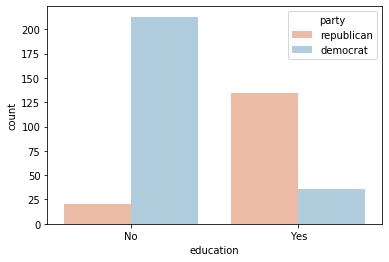

In [0]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

2. Voting patterns of the satellite bill.

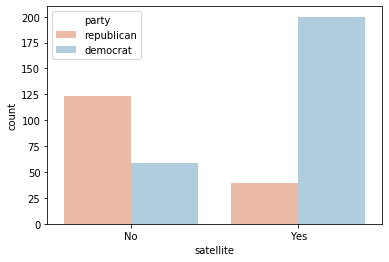

In [0]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

3. Voting patterns of the missile bill.

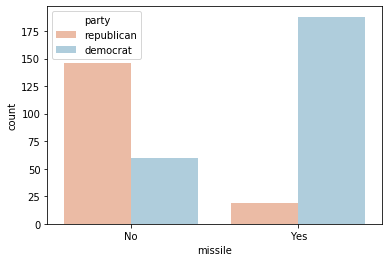

In [0]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()